In [8]:
# System
import os

# Arrays
import numpy as np

# Data analysis
import pandas as pd

# Deep learning 
from keras.models import Model
from keras.layers import Lambda, Input, Dense
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

Get data

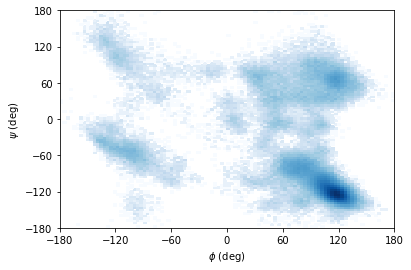

In [18]:
# Define path to structure files
filepath = "../datasets/MD_datasets.csv"
datasets = pd.read_csv(filepath,
                       names=["phi", "psi"])

# visualize
fig, ax = plt.subplots()

ax.axis([-180,180,-180,180])
ax.set(xticks=range(-180, 181, 60), yticks=range(-180, 181, 60),
        xlabel=r"$\phi$ (deg)", ylabel=r"$\psi$ (deg)")
    
r = datasets['phi']
u = datasets['psi']

ax.hist2d(np.rad2deg(r), np.rad2deg(u), 
          bins=100, range=[[-180,180],[-180,180]], 
          norm=LogNorm(), cmap=plt.cm.Blues)

plt.show()

In [ ]:
Define model